In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
top_following = pd.read_csv('./top_following_data.txt',sep='\t',encoding='utf-8')
waist_following = pd.read_csv('./waist_following_data.txt',sep='\t',encoding='utf-8')
top_data = top_following[['source_id', 'target_id']]
waist_data = waist_following[['source_id', 'target_id']]

In [4]:
def draw_network(data):
    G = nx.DiGraph()
    cnt = 0
    for d in data.iterrows():
        G.add_edge(d[1][0],d[1][1])
        cnt += 1
    print('number of nodes:', G.number_of_nodes())
    print('links number:', cnt)
    return G

In [5]:
def strongly_connected_components(data):    
    G = draw_network(data)
    
    scomponents = nx.strongly_connected_components(G)
    length_list, scomponent_list = [], []
    for c in scomponents:
        length_list.append(len(c))
        scomponent_list.append(list(c))
    print('components nodes distribution:', sorted(length_list, reverse=True))
    max_scomponent = scomponent_list[np.argmax(length_list)]
    return max_scomponent

In [6]:
top_max_scomponent_list = strongly_connected_components(top_data)

number of nodes: 430
links number: 3791
components nodes distribution: [241, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
waist_max_scomponent_list = strongly_connected_components(waist_data)

number of nodes: 1418
links number: 33326
components nodes distribution: [1120, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
def strongly_connected_components_graph(strongly_connected_components_list, following_data):
    strongly_connected_components_data = following_data[(following_data.target_id.isin(strongly_connected_components_list))&(following_data.source_id.isin(strongly_connected_components_list))]
    graph = draw_network(strongly_connected_components_data)
    print('average_shortest_path_length:', nx.average_shortest_path_length(graph))
    print('diameter:', nx.diameter(graph))
    print('radius:', nx.radius(graph))
    print('density:', nx.density(graph))
    print('center of the graph:', nx.center(graph))
    return graph

In [9]:
top_graph = strongly_connected_components_graph(top_max_scomponent_list, top_data)

number of nodes: 241
links number: 2901
average_shortest_path_length: 3.06533540802213
diameter: 9
radius: 4
density: 0.05015560165975104
center of the graph: ['河森堡', '梁悦', '简浅']


In [10]:
waist_graph = strongly_connected_components_graph(waist_max_scomponent_list, waist_data)

number of nodes: 1120
links number: 30036
average_shortest_path_length: 2.922312651602196
diameter: 8
radius: 4
density: 0.02396591344312524
center of the graph: ['warfalcon', '芈十四', '李征义', '贺仙', 'ho Ec', 'Quartz', '叶壮', '刘卿', '黄磊', '陈子杨Dr.outside', '贺嘉', '流浪的蛤蟆', 'Sean Ye', '遠夏', '朱王勇', '魏俊年', '大梦', '夜孤橙', 'MaxSam', '浑沌', '何饱饱', '起点中文网', '尚萌', 'xiang luca', '金知', '萧萧', '芊小桌儿', '这是eno', '芝麻酱', '手抖毛大夫', '梨花与虎', '王家CFA', '陈强', '周宓', '大壮', '王瑞恩', '李嗲Lydia', '半佛仙人', '宋雯婷', '王诺诺', '崇九', '汪惟', '兔撕鸡大老爷', '翡柏', '杰克码', 'FanFanFan', '卢诗翰', '丧心病狂刘老湿', '惊云', '吴清缘', 'TopView', '尼克六六', '汗青', '筑室', '既生宇何生亮', '万金油', '曹小灵', '欧阳畅', 'Lightman', '李傲文', '朱聿欣', '梦尧', '瞻云', '童哲', '断桥', '橘绯影', '白金一只猫', '门徒', '框框框子', '吴声威', '曹力科', '陷阱23', '是minno']


In [11]:
def pagerank_hits(G):
    # PageRank
    pr = nx.pagerank(G, alpha=0.85)
    prsorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    print('\npagerank top 10:\n')
    for p in prsorted[:10]:
        print(p[0], p[1])
    
    # HITS
    hub, auth = nx.hits(G, max_iter=2000)
    print('\nhub top 10:\n')
    for h in sorted(hub.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(h[0], h[1])
    print('\nauth top 10:\n')   
    for a in sorted(auth.items(), key=lambda x: x[1], reverse=True)[:10]:     
        print(a[0], a[1])

In [12]:
pagerank_hits(top_graph)


pagerank top 10:

知乎日报 0.04356252341315649
知乎小管家 0.03499341214239902
马伯庸 0.026568589495010685
郎朗 0.02467989930489073
李松蔚 0.024134191502693105
丁香医生 0.02201760951681888
朱炫 0.021562743728756103
葛巾 0.021107030198526867
chenqin 0.019680325621280338
梁边妖 0.018876269337148054

hub top 10:

梁悦 0.023164561595000063
小猫倩倩 0.02026179172531068
戈玄白今天要做题 0.020089652244048156
商陆 0.019456375315444866
人间火蜜桃 0.018274725748567054
电动Emma 0.017626667590462764
厂花蛋蛋姐 0.01751181192238822
田浩 0.015850619407031762
栗之 0.01583403867814461
潇峰学长 0.015594315922439133

auth top 10:

朱炫 0.02350786624848316
梁边妖 0.023231273636014956
马伯庸 0.022018073874873166
李松蔚 0.0215528325375999
知乎小管家 0.021222121203205692
曾加 0.020670038404489357
葛巾 0.020224505423095673
河森堡 0.020015449792733
肥肥猫 0.019203521215951695
丁香医生 0.018777224086553027


In [13]:
pagerank_hits(waist_graph)


pagerank top 10:

张佳玮 0.018218781298713804
知乎机构号团队 0.012228237062269602
知乎汽车 0.008740721962503329
知乎校园 0.007818226684596846
动机在杭州 0.007741818731517808
王瑞恩 0.007720702158448368
megadrive2 0.007274496147376589
司马懿 0.007056136964855295
KnowYourself 0.006922709318287213
李雷 0.005913051837014087

hub top 10:

万金油 0.011817087785641594
欧阳畅 0.007246085077398742
周宓 0.007237031028355694
翡柏 0.007155700056277434
山羊月 0.0065728246414588866
杨大宝在思考 0.006329694880595819
李征义 0.006228469113444351
王瑞恩 0.006162372286124515
梨花与虎 0.0060557959245149
李傲文 0.006004686182974593

auth top 10:

张佳玮 0.009217847085828288
王诺诺 0.0068615029342077765
王瑞恩 0.006416146973772932
谢熊猫君 0.0063760402945718655
苏莉安 0.0060807070266883
司马懿 0.005966705970318036
李雷 0.005958085592689502
动机在杭州 0.005753126772519532
汪惟 0.005681748913974846
豆子 0.005663895463655737


In [14]:
def centrality(G):
    in_degree = nx.in_degree_centrality(G)
    print('in degree centrality top 10:\n')
    for d in sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    betweenness = nx.betweenness_centrality(G, normalized=True)
    print('\nbetweenness centrality top 10:\n')
    for d in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    closeness = nx.closeness_centrality(G)
    print('\ncloseness centrality top 10:\n')
    for d in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    user_betweenness_list = sorted(betweenness.values(), reverse=True)
    plt.figure('Betweenness Distribution', dpi=120)
    plt.title('Betweenness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Betweeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_betweenness_list))), user_betweenness_list, color='k')

    user_closeness_list = sorted(closeness.values(), reverse=True)
    plt.figure('Closeness Distribution', dpi=120)
    plt.title('Closeness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Closeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_closeness_list))), user_closeness_list, color='k')
    
    plt.show()

in degree centrality top 10:

知乎小管家 0.29583333333333334
丁香医生 0.2791666666666667
李松蔚 0.275
朱炫 0.2708333333333333
马伯庸 0.2583333333333333
梁边妖 0.25416666666666665
河森堡 0.22083333333333333
葛巾 0.2125
小约翰 0.20833333333333334
曾加 0.20833333333333334

betweenness centrality top 10:

小约翰 0.1378629911643918
丁香医生 0.09091913733089037
知乎日报 0.0693214828941481
曾加 0.06572671605255294
河森堡 0.06054125444085454
梁悦 0.059722542088258786
朱炫 0.058679266953659145
巴赫爱喝胡辣汤 0.05280074500557632
梁边妖 0.04838351609578015
田浩 0.04346667493039063

closeness centrality top 10:

知乎小管家 0.5357142857142857
马伯庸 0.5274725274725275
李松蔚 0.5084745762711864
丁香医生 0.5063291139240507
朱炫 0.4948453608247423
chenqin 0.4928131416837782
河森堡 0.48484848484848486
梁边妖 0.48484848484848486
曾加 0.4838709677419355
知乎日报 0.482897384305835


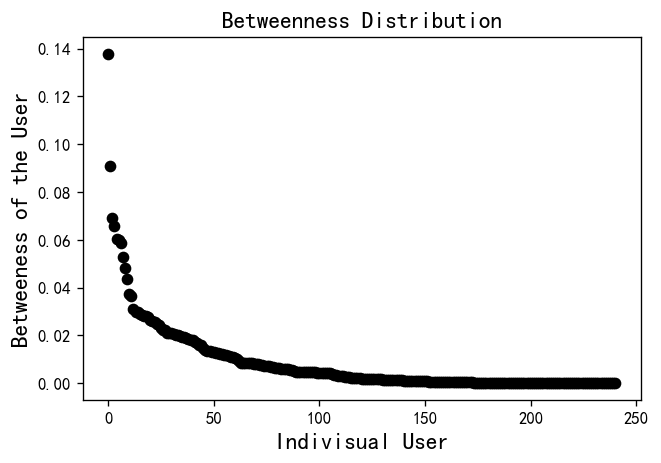

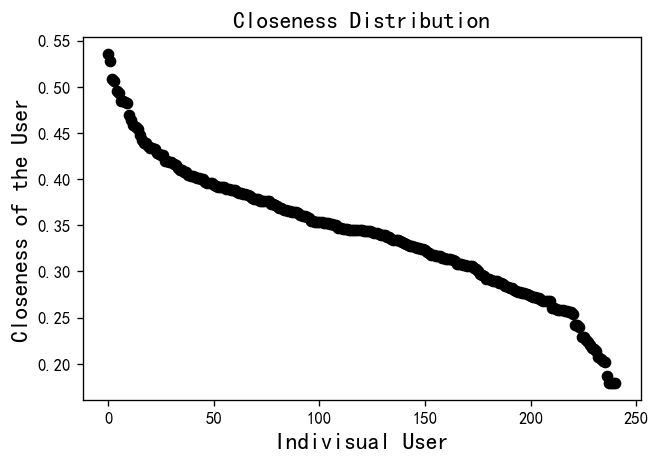

In [15]:
centrality(top_graph)

in degree centrality top 10:

张佳玮 0.43967828418230565
司马懿 0.2100089365504915
动机在杭州 0.2001787310098302
KnowYourself 0.19302949061662197
王诺诺 0.1867739052725648
李雷 0.18588025022341376
王瑞恩 0.18498659517426272
王子君 0.1778373547810545
warfalcon 0.17605004468275245
megadrive2 0.17515638963360142

betweenness centrality top 10:

万金油 0.0625424909549103
流浪的蛤蟆 0.04506058295637979
Sean Ye 0.043336827264829174
李征义 0.03877530820904552
王瑞恩 0.033166315280652704
张佳玮 0.02980786859599036
司马懿 0.02932632813962928
路人甲 0.028700217985074668
任玩堂 0.028449131355632967
warfalcon 0.028115932560105993

closeness centrality top 10:

张佳玮 0.6065040650406504
司马懿 0.5065640561339972
动机在杭州 0.5036003600360036
王瑞恩 0.49910793933987513
李雷 0.4968916518650089
KnowYourself 0.49360388178209086
王诺诺 0.489501312335958
megadrive2 0.48907342657342656
warfalcon 0.4860990443092963
王子君 0.4848353552859619


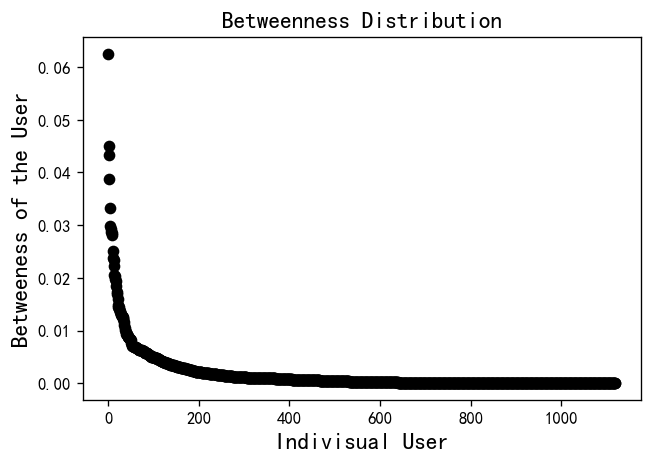

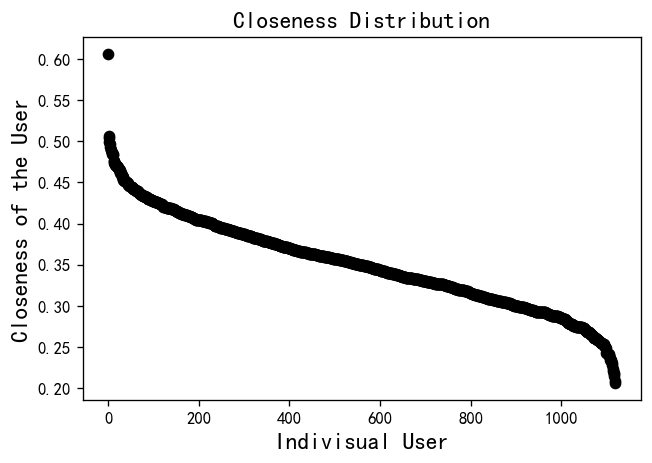

In [16]:
centrality(waist_graph)